# Analysis on Airbnb Open Data

## Basic Information from Kaggle Page

### [Boston Airbnb Open Data](https://www.kaggle.com/airbnb/boston)

__Context__
<br> Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.

__Content__
<br> The following Airbnb activity is included in this Boston dataset: 
* Listings, including full descriptions and average review score 
* Reviews, including unique id for each reviewer and detailed comments 
* Calendar, including listing id and the price and availability for that day

__Inspiration__
* Can you describe the vibe of each Boston neighborhood using listing descriptions?
* What are the busiest times of the year to visit Boston? By how much do prices spike?
* Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?
<br> For more ideas, visualizations of all Boston datasets can be found [here](http://insideairbnb.com/boston/).

__Acknowledgement__
<br> This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html
).
<br> <br> 
### [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data)

__Context__
<br> Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

__Content__
<br> The following Airbnb activity is included in this Seattle dataset: 
* Listings, including full descriptions and average review score 
* Reviews, including unique id for each reviewer and detailed comments 
* Calendar, including listing id and the price and availability for that day

__Inspiration__
* Can you describe the vibe of each Seattle neighborhood using listing descriptions?
* What are the busiest times of the year to visit Seattle? By how much do prices spike?
* Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle
<br> For more ideas, visualizations of all Seattle datasets can be found [here](http://insideairbnb.com/seattle/).

__Acknowledgement__
<br> This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html).




If you are looking to really challenge yourself, data from Seattle and Boston AirBNB homes can be used to understand
* how much AirBNB homes are earning in certain time frames and areas. 
* You can compare rates between the two cities, or try to understand if there is anything about the properties that helps you predict price. 
* Can you find negative and positive reviews based on text? 
<br> This dataset requires a number of skills beyond those shown thus far in the course, but if you would like a challenge, this will certainly test your ability to work with messy, real world data.

In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import copy

import os
from datetime import date, datetime, timedelta

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

#pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# Source: https://github.com/epmoyer/ipy_table/issues/24
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [3]:
df_boston_calendar = pd.read_csv('boston-airbnb-open-data/calendar.csv')
df_boston_listings = pd.read_csv('boston-airbnb-open-data/listings.csv')
df_boston_reviews = pd.read_csv('boston-airbnb-open-data/reviews.csv')

df_seattle_calendar = pd.read_csv('seattle/calendar.csv')
df_seattle_listings = pd.read_csv('seattle/listings.csv')
df_seattle_reviews = pd.read_csv('seattle/reviews.csv')

# Calendar

In this session, I am going to explore the calendar data and try to understand following questions:
1. How does availability changes across our observation. Here availability might be defined in following two ways:
    - Day Availability: For each listing, what is the average number of days being available.
    - Listing Availability: For each time frame, what is the average number of listings being available.
1. How does mean price varies by availability and time frame. The mean price are defined as 
    - Mean Day Price: For each listing, it is the average price when it is available.
    - Mean Listing Price: For each time frame, it is the average price of available listings during that unit..
1. How does availability and mean price varies between Boston and Seattle.
1. If all available listings were booked, how much the difference would be between Boston and Seattle.

In the following cells, I am going to do
- Take a Preview of both Boston and Seattle Date.
- Check the duplicates.
- Check Missing Values.

In [4]:
# Preview Columns in both Boston Data and Seattle Data
multi_table([df_boston_calendar.head(5), df_seattle_calendar.head(5)])

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN


In [5]:
# Check Duplicates
print ("Duplicate Check - Boston Data\n", df_boston_calendar.shape[0], ",", df_boston_calendar.drop_duplicates(keep = "first").shape[0])
print ("\n------------------------------------------")
print ("\nDuplicate Check - Seattle Data\n", df_seattle_calendar.shape[0], ",", df_seattle_calendar.drop_duplicates(keep = "first").shape[0])

Duplicate Check - Boston Data
 1308890 , 1308525

------------------------------------------

Duplicate Check - Seattle Data
 1393570 , 1393570


In [6]:
# Check Missing Values in both Boston and Seattle Data
print ("Missing Value Check - Boston Data\n", (df_boston_calendar.isnull()).sum(), )
print ("\n-------Missing Value in Price by Available\n", )
print (df_boston_calendar["price"].isnull().groupby(df_boston_calendar["available"]).sum().astype(int))
print ("\n-----------------------------------------")
print ("\nMissing Value Check - Seattle Data\n", (df_seattle_calendar.isnull()).sum(), )
print ("\n-------Missing Value in Price by Available\n", )
print (df_seattle_calendar["price"].isnull().groupby(df_seattle_calendar["available"]).sum().astype(int))

Missing Value Check - Boston Data
 listing_id         0
date               0
available          0
price         665853
dtype: int64

-------Missing Value in Price by Available

available
f    665853
t         0
Name: price, dtype: int64

-----------------------------------------

Missing Value Check - Seattle Data
 listing_id         0
date               0
available          0
price         459028
dtype: int64

-------Missing Value in Price by Available

available
f    459028
t         0
Name: price, dtype: int64


1. Both Boston and Seattle data contain columns `listing_id, date, available, and price`.
1. Boston data contains duplicates, and Seattle data does not.
1. `price` is the only column conains missing value in both Boston and Seattle data, but it matches with `available` status, that is only unavailable listings have missing values in `price` field.
1. `price` are recorded using a string format, which contains dollar sign and comma.

For further analysis, I am going to do following changes to these two datasets.
- Remove Duplicates in Boston Data.
- Keep NaN values in both datasets.
- Add column containing city information in each data set, and then combine these two sets into one dataframe.
- Remove Dollar Sign and Comma in `price` and then convert it to float format.

In [15]:
df_boston_calendar["city"] = "Boston"
df_seattle_calendar["city"] = "Seattle"

df_calendar = df_boston_calendar.drop_duplicates(keep = "first").append(df_seattle_calendar, 
                                                                        ignore_index = True, 
                                                                        verify_integrity = True)

df_calendar["price_cleaned"] = df_calendar["price"].apply(lambda x: x.replace("$", "").replace(",", "") 
                                                          if pd.isnull(x) == False else np.nan)
df_calendar["price_cleaned"] = df_calendar["price_cleaned"].astype(float)

multi_table([df_calendar.head(10), df_calendar.tail(10)])

,listing_id,date,available,price,city,price_cleaned
0,12147973,2017-09-05,f,NaN,Boston,NaN
1,12147973,2017-09-04,f,NaN,Boston,NaN
2,12147973,2017-09-03,f,NaN,Boston,NaN
3,12147973,2017-09-02,f,NaN,Boston,NaN
4,12147973,2017-09-01,f,NaN,Boston,NaN
5,12147973,2017-08-31,f,NaN,Boston,NaN
6,12147973,2017-08-30,f,NaN,Boston,NaN
7,12147973,2017-08-29,f,NaN,Boston,NaN
8,12147973,2017-08-28,f,NaN,Boston,NaN
9,12147973,2017-08-27,f,NaN,Boston,NaN


In [16]:
# Check Observation Window, Observed Listings of Each City
df_calendar.groupby("city").agg({"date": ["min", 
                                          "max", 
                                          lambda x: pd.to_datetime(x.max()) - pd.to_datetime(x.min())], 
                                 "listing_id": "nunique"
                                })

date                      listing_id
                min         max <lambda>    nunique
city                                               
Boston   2016-09-06  2017-09-05 364 days       3585
Seattle  2016-01-04  2017-01-02 364 days       3818

1. Boston data contains information between 2016-09-06 and 2017-09-05, the length of observation is 365 days, and number of distinct listings observed is 3585.
1. Seattle data contains information between 2016-01-04 and 2017-01-02, the length of observation is 365 days, and number of distinct listings observed is 3818.

In [18]:
# Availability 

## Check Avalability of Each Listing by City
df_calendar_avail_listing = \
pd.concat([
    df_calendar.groupby(["city", "listing_id"])["date"].count().to_frame("days_listed"),
    df_calendar.query('available == "f"').groupby(["city", "listing_id"])["date"].count().to_frame("days_unavailable"),
    df_calendar.query('available == "t"').groupby(["city", "listing_id"])["date"].count().to_frame("days_available"),
    df_calendar.query('available == "t"').groupby(["city", "listing_id"])["price_cleaned"].mean().to_frame("mean_day_price")
], axis = 1).reset_index().fillna(0)

df_calendar_avail_listing["day_available_rate"] = \
1.0 * df_calendar_avail_listing["days_available"] / df_calendar_avail_listing["days_listed"]

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 
## Check Avalability of Each Date by City
df_calendar_avail_date = \
pd.concat([
    df_calendar.groupby(["city", "date"])["listing_id"].count().to_frame("listings_listed"),
    df_calendar.query('available == "f"').groupby(["city", "date"])["listing_id"].count().to_frame("listings_unavailable"),
    df_calendar.query('available == "t"').groupby(["city", "date"])["listing_id"].count().to_frame("listings_available"),
    df_calendar.query('available == "t"').groupby(["city", "date"])["price_cleaned"].mean().to_frame("mean_listing_price")    
], axis = 1).reset_index().fillna(0)


df_calendar_avail_date["listing_available_rate"] = \
1.0 * df_calendar_avail_date["listings_available"] / df_calendar_avail_date["listings_listed"]


## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

## Check Avalability of Each Month by City
#df_calendar["month"] = df_calendar["date"].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m'))
df_calendar["month"] = df_calendar["date"].apply(lambda x: x[:-3])

df_calendar_avail_month = \
pd.concat([
    df_calendar.groupby(["city", "month"])["listing_id"].count().to_frame("listings_listed"),
    df_calendar.query('available == "f"').groupby(["city", "month"])["listing_id"].count().to_frame("listings_unavailable"),
    df_calendar.query('available == "t"').groupby(["city", "month"])["listing_id"].count().to_frame("listings_available"),
    df_calendar.query('available == "t"').groupby(["city", "month"])["price_cleaned"].mean().to_frame("mean_listing_price"),
    df_calendar.query('available == "t"').groupby(["city", "month"])["price_cleaned"].sum().to_frame("total_listing_price")
], axis = 1).reset_index().fillna(0)


df_calendar_avail_month["listing_available_rate"] = \
1.0 * df_calendar_avail_month["listings_available"] / df_calendar_avail_month["listings_listed"]

plot_pivot_avail = pd.pivot_table(df_calendar_avail_month, index = "month", columns = "city", 
                                  values = ["listing_available_rate", "mean_listing_price", "total_listing_price"])

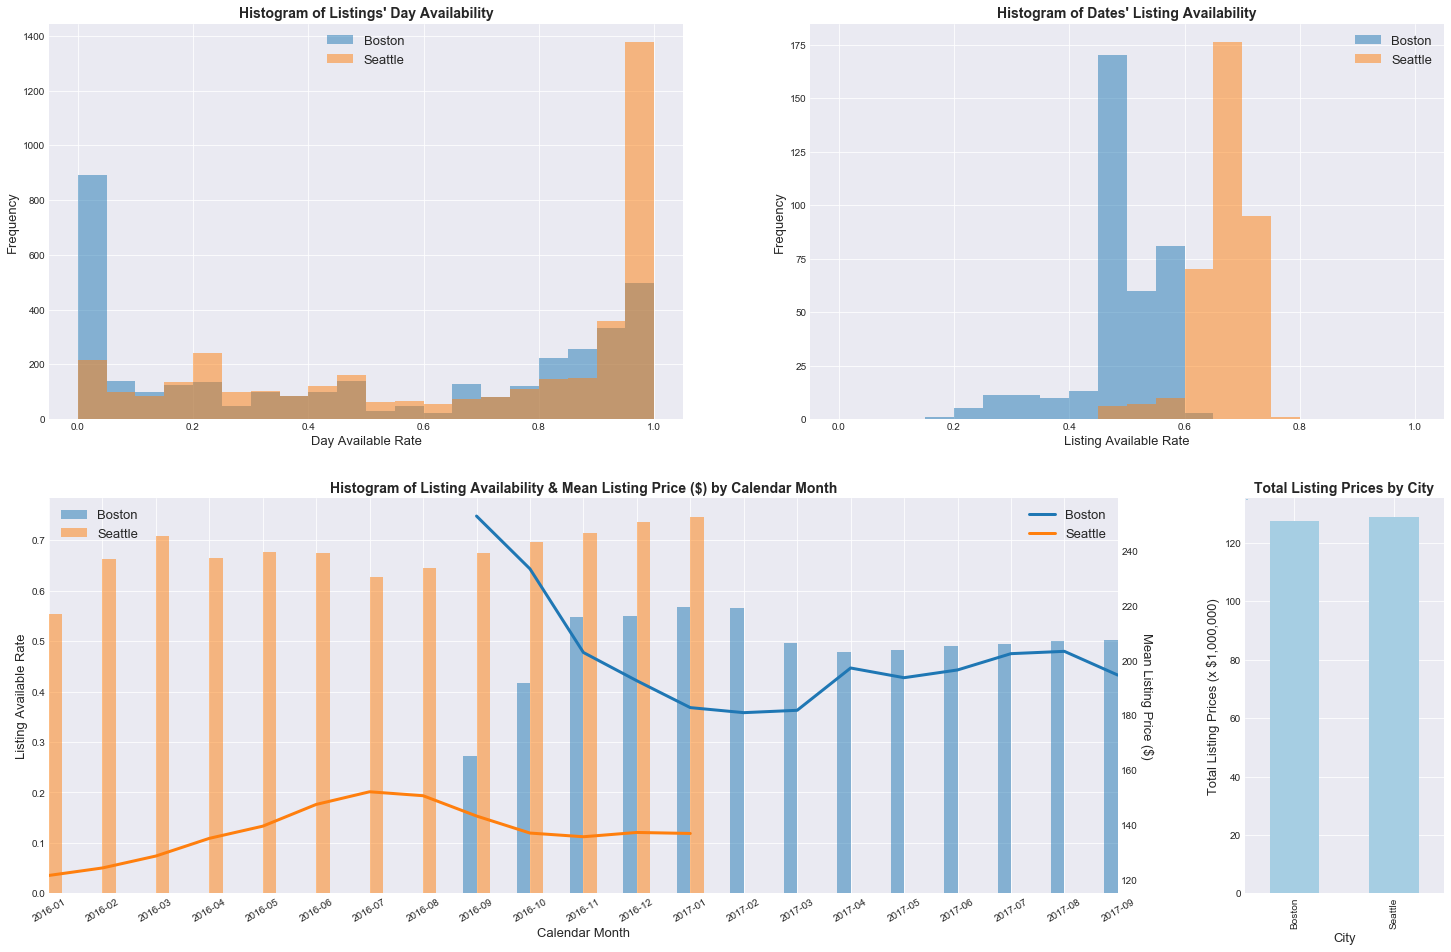

In [19]:
ax1 = plt.subplot2grid((2, 13), (0, 0), colspan = 6)
ax2 = plt.subplot2grid((2, 13), (0, 7), colspan = 6)
ax3 = plt.subplot2grid((2, 13), (1, 0), colspan = 10)
ax4 = plt.subplot2grid((2, 13), (1, 11), colspan = 2)


df_calendar_avail_listing.groupby("city")["day_available_rate"].plot(kind = "hist", bins = 20, 
                                                                ax = ax1,
                                                                alpha = 0.5, legend = True);
ax1.set_title("Histogram of Listings' Day Availability", fontsize = 14, fontweight = "bold");
ax1.set_ylabel("Frequency", fontsize = 13);
ax1.set_xlabel("Day Available Rate", fontsize = 13);
ax1.legend(loc = "upper center", fontsize = 13);

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

df_calendar_avail_date.groupby("city")["listing_available_rate"].plot(kind = "hist", 
                                                                     bins = np.array(range(0,101,5))/100.0, 
                                                                     ax = ax2, 
                                                                     alpha = 0.5, legend = True);
ax2.set_title("Histogram of Dates' Listing Availability", fontsize = 14, fontweight = "bold");
ax2.set_ylabel("Frequency", fontsize = 13);
ax2.set_xlabel("Listing Available Rate", fontsize = 13);
ax2.legend(loc = "upper right", fontsize = 13);

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

plot_pivot_avail["listing_available_rate"].plot(kind = "bar", alpha = 0.5, ax = ax3, figsize = (25,16));
ax3.set_title("Histogram of Listing Availability & Mean Listing Price ($) by Calendar Month", 
              fontsize = 14, fontweight = "bold");
ax3.set_ylabel("Listing Available Rate", fontsize = 13);
ax3.set_xticklabels(plot_pivot_avail.index, rotation = 30);
ax3.set_xlabel("Calendar Month", fontsize = 13);
ax3.legend(loc = "upper left", fontsize = 13);

ax3_twin = ax3.twinx()  
plot_pivot_avail["mean_listing_price"].plot(kind = "line", ax = ax3_twin, linewidth = "3");
ax3_twin.legend(loc = "upper right", fontsize = 13);
ax3_twin.set_ylabel("Mean Listing Price ($)", rotation = 270, labelpad = 15, fontsize = 13);
ax3_twin.grid(False);

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

(df_calendar.groupby("city")["price_cleaned"].sum()/1000000.0).plot(kind = "bar", colormap = "Paired", ax = ax4);
ax4.set_title("Total Listing Prices by City", fontsize = 14, fontweight = "bold");
ax4.set_ylabel("Total Listing Prices (x $1,000,000)", fontsize = 13);
ax4.set_xlabel("City", fontsize = 13);
ax4.legend([""], loc = "upper left", fontsize = 0);

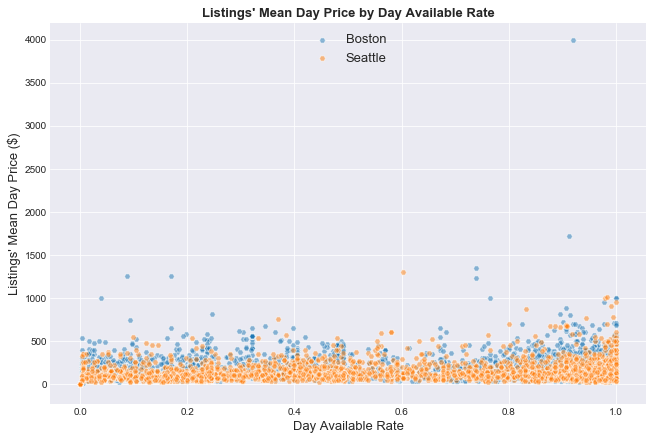

In [20]:
plot_sns = sns.pairplot(df_calendar_avail_listing, x_vars = "day_available_rate", y_vars = "mean_day_price", 
             hue = "city", size = 6, aspect = 1.5, markers = ["H", "H"],
             plot_kws = {'alpha': 0.5});
plot_sns._legend.remove()
plt.title("Listings' Mean Day Price by Day Available Rate", fontsize = 13, fontweight = "bold");
plt.xlabel("Day Available Rate", fontsize = 13);
plt.ylabel("Listings' Mean Day Price ($)", fontsize = 13);
plt.legend(loc = "upper center", fontsize = 13);

__Summary:__


1. Per bar chart of availability by listing, Seattle listings generally have higher days availability.
    - The most frequent days availability group of Seattle listings during a year is (0.95, 1.0), while that of Boston is (0, 0.05).
    - The days availability group frequency of Seattle listings are highly skewed. The highest bar appears on the highest availability group, and it is more than 3 times to the second frequent group, which is also the second highest availability group. However, that of Boston is more like a curve with one peak at the lowest availability group and the other on the higher availability groups.
<br><br>
1. Per bar chart of availability by date, Seattle also has higher listing availability.
    - During one year period, most of time, the listing availability on a date of Seattle is (0.6, 0.75), with highest availability group (0.65,0.70). While for Boston, the listing availability on a date is (0.45, 0.6), and its highest availability group is (0.45, 0.50).
<br><br>
1. Per chart by calendar month, Seattle has higher listing availability with lower mean listing price, and Boston has lower listing availability but higher mean listing price. And these makes the total price of these two cities very close, if all available listings were booked.
<br><br>
1. Per chart showing listings’ day availability and their corresponding mean day price, we could observe that the price for Seattle is relatively stable across all listings with different day availability. However, there do be some differences for Boston listings.

# Review

In this session, I am going to explore the reviews data and try to understand following questions:
1. How does review differ across time? 
1. How does review differ across cities? 

To answer first two questions, I am going to define listings' mean review rate as the average number of reviews a listing get for a given time frame.

Also, I would like to try to cluster reviews into 2 groups.

In the following cells, I am going to do
- Take a Preview of both Boston and Seattle Date.
- Check the duplicates.
- Check Missing Values.

In [4]:
# City Data Preview
multi_table([df_boston_reviews.head(),df_seattle_reviews.head()])

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...


In [22]:
# Check Duplicates
print (df_boston_reviews.drop_duplicates(keep = "first").shape[0], df_boston_reviews.shape[0])
print (df_seattle_reviews.drop_duplicates(keep = "first").shape[0], df_seattle_reviews.shape[0])

68275 68275
84849 84849


In [7]:
# Check Missing Values in both Boston and Seattle Data
print ("Missing Value Check - Boston Data\n", (df_boston_reviews.isnull()).sum(), )
print ("\n-----------------------------------------")
print ("\nMissing Value Check - Seattle Data\n", (df_seattle_reviews.isnull()).sum(), )

Missing Value Check - Boston Data
 listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         52
dtype: int64

-----------------------------------------

Missing Value Check - Seattle Data
 listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         17
dtype: int64


1. Both Boston and Seattle data contain columns `listing_id, id, date, reviewer_id, reviewer_name, and comments`. 
1. None of these two datasets contains duplcates.
1. Boston data contains 52 missing values in `comments` column. And Seattle data contains 17 missing values in the same column. 

For further analysis, I am going to do following changes to these two datasets.
1. Drop rows with missing comments.
1. Add column containing city information in each data set, and then combine these two sets into one dataframe.

In [9]:
df_boston_reviews["city"] = "Boston"
df_seattle_reviews["city"] = "Seattle"

df_reviews = \
df_boston_reviews.append(df_seattle_reviews, ignore_index = False, verify_integrity = False)\
.dropna(subset = ["comments"], how = "any", axis = 0)

In [13]:
# Check Observation Window, Observed Listings and their Reviews of Each City
df_reviews.groupby("city").agg({"date": ["min", 
                                         "max", 
                                          lambda x: pd.to_datetime(x.max()) - pd.to_datetime(x.min())], 
                                 "id": "count",
                                 "listing_id": "nunique",
                                 "reviewer_id": "nunique"
                                })

date                           id listing_id reviewer_id
                min         max  <lambda>  count    nunique     nunique
city                                                                   
Boston   2009-03-21  2016-09-06 2726 days  68223       2829       63742
Seattle  2009-06-07  2016-01-03 2401 days  84832       3191       75718

1. Boston data contains information between 2009-03-21 and 2016-09-06, the length of observation is 2727 days, and number of distinct reviews observed is 63742, belong to 68223 unique listings and 2829 unique reviewers.
1. Seattle data contains information between 2009-06-07 and 2016-01-03, the length of observation is 2402 days, and number of distinct reviews observed is 75718, belong to 84832 unique listings and 3191 unique reviewers.

In [95]:
df_reviews["month"] = df_reviews["date"].apply(lambda x: x[:-3])

df_reviews_month = \
pd.concat([
    df_reviews.groupby(["city", "month"])["id"].count().to_frame("count_reviews"),
    df_reviews.groupby(["city", "month"])["listing_id"].nunique().to_frame("count_listings")
], axis = 1).reset_index().fillna(0)


df_reviews_month["listing_review_rate"] = \
1.0 * df_reviews_month["count_reviews"] / df_reviews_month["count_listings"]

In [97]:
plot_pivot_month = \
pd.pivot_table(df_reviews_month.query('count_listings >= 30'), 
               index = "month", columns = "city", 
               values = "listing_review_rate")

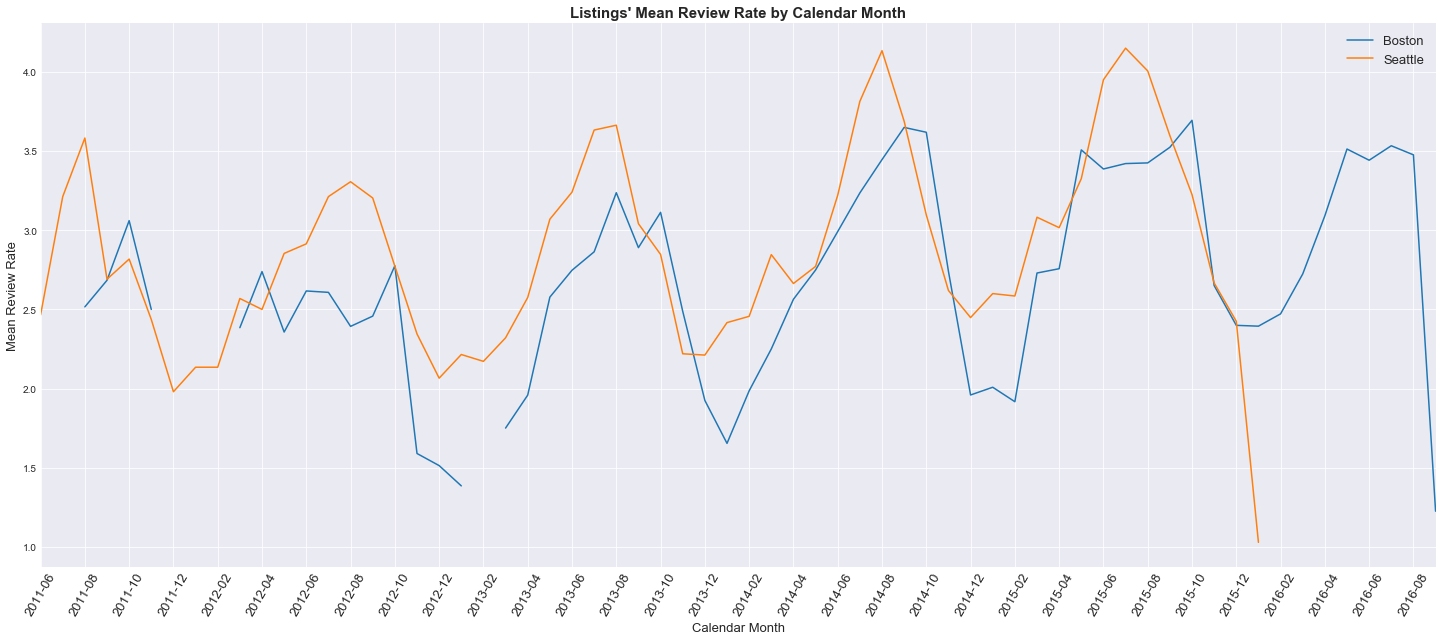

In [101]:
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan = 1)

plot_pivot_month.plot(kind = "line", figsize = (25,10), ax = ax1);
ax1.set_title("Listings' Mean Review Rate by Calendar Month", fontsize = 15, fontweight = "bold");
ax1.set_ylabel("Mean Review Rate", fontsize = 13);
ax1.set_xlabel("Calendar Month", fontsize = 13);
ax1.legend(loc = "upper right", fontsize = 13);
ax1.set_xticks(range(len(plot_pivot_month.index))[::2]);
ax1.set_xticklabels(plot_pivot_month.index[::2], rotation = 60, fontsize = 13);

__Summary:__

Per chart mean listing review by calendar month, 
1. Review is quite seasonal, Mean listing review in Seattle generally peaks around August every year, while that of Boston is October. But both of them are trending up since 2012.
1. Seattle listings have more reviews. Mean listing review in Seattle are mainly above those in Boston. 

In the following part, I am going to fit KMeans to cluster reviews into 2 groups. 

In [187]:
df_review_sample = df_reviews.query('city == "Boston"')[:10000].append(df_reviews.query('city == "Seattle"')[:10000])

In [188]:
df_review_sample_copy = df_review_sample.copy(deep = True)

In [189]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df_review_sample["comments"].values)

In [190]:
print(vectorizer.get_feature_names()[:15])

['00', '000', '00am', '00pm', '01', '04', '06', '0800', '09', '0dark30', '10', '100', '1000', '100m', '100mt']


In [191]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 2, random_state = 42).fit(X)

In [192]:
df_review_sample.insert(loc = 0, column = "cluster", value = clf.predict(X))
df_review_sample.head()

,cluster,listing_id,id,date,reviewer_id,reviewer_name,comments,city,month
0,1,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Boston,2013-05
1,1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Boston,2013-05
2,1,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Boston,2013-06
3,1,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Boston,2013-06
4,1,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Boston,2013-06


In [193]:
df_review_sample.query('cluster == 1')["comments"].values[:5]

array(["My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)",
       'Great location for both airport and city - great amenities in the house: Plus Islam was always very helpful even though he was away',
       "We really enjoyed our stay at Islams house. From the outside the house didn't look so inviting but the inside was very nice! Even though Islam himself was not there everything was prepared for our arrival. The airport T Station is only a 5-10 min walk away. The only little issue was that all the people in the house had to share one bathroom. But it was not really a problem and it worked out fine. We would recommend Islams place for a stay in Boston. ",
       'The room was nice and clean and so were the commodities. Very close to the airport metro station and located in 

In [194]:
df_review_sample.query('cluster == 0')["comments"].values[:5]

array(['It was a really nice time in Boston - best place to stay over in Boston !! Really nice and helpful hosts - taking there time to explain all the good things to see and how to come there.\r\nWe had a really nice time in Boston and they had a big part on that.\r\nIf you want to go out doing sth - just ask them and they may come with you.\r\nReally nice and clean house - near to the airport and the subway station ( like 6 minutes away ). \r\n\r\nWe had a really good time there and can just recommend it to anyone who want to have a comfortable and enjoyable place to stay in Boston for a good price. Thanks a lot.\r\n',
       "Communication with Islam and his brother was good. However, we arrived at their house and the toilet was completely plugged up and full of excrements. At this point, we were totally disgusted. We went out to town, which by train takes about 15mn plus 10mn walk to the station. We managed to speak with Islam brother. He fixed the problem when we came back by 4pm.

__Summary:__   

In this part, due to computational capacity, I only took 10000 samples from each city's review data for model fitting.

Comments are transformed into vectors with CountVectorizer. And then, KMeans is used to clustered transformed data into 2 groups.

Per last two cells, we found this method did do some good job on clustering Positive Reviews into Cluster 1 and Not-Positive Reviews into the Cluster 0. 

However, as there are so many terms, say transformed vector is too large, this influences our model fitting quite a lot. Some optimization on Vectorization comments should be done for the purpose of improvement.

# Listings

In this part, I plan to explore the listings data and work to understand
1. What kind of features would impact prices in Boston and Seattle Listings. And how do those features differ between these two cities.
1. Fit Random Forest Regressor to predict price.

In [381]:
df_boston_listings.shape, df_seattle_listings.shape

((3585, 96), (3818, 92))

In [382]:
df_boston_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_cleaned
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN,250.0
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, 

In [383]:
df_seattle_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

After reading first 3 records from both Boston and Seattle Listings file, I extracted following columns for price prediction:
1. `price`: Response variable.
1. `host_response_time, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification`: These variables reflects the service a customer would get.
1. `guests_included", "extra_people", "minimum_nights`: This variable tell extra information about listing's requirements or limitations.
1. `neighbourhood_cleansed`: This variable tells the location of the listing.
1. `property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type`: These variables represents the profile of the listing. 
1. `availability_30, availability_60, availability_90, availability_365`: These variables captures the demand and supply relationship of the listing. 
1. `number_of_reviews, reviews_per_month, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value`: These varaibles are historical information might affect customers impression on the listing.


Next, I am going to write 3 functions, clean, feature_importance, and model_fit.

In [305]:
def clean(df):
    """
    Inputs: dataframe
    
    Output: cleaned dataframe
    
    Steps taken:
        1. Keep columns interested in 
        2. Transfer values in columns ["price", "extra_people"] into right format, remove "$", ",", and format to float
        3. Encode categorical variables with dummy variables
        4. Fill missing values with mean or mode, 
        - use mean for columns in ["bathrooms", "bedrooms", "beds"] 
        - use first mode for columns in ["reviews_per_month", "review_scores_rating", 
                                         "review_scores_accuracy", "review_scores_cleanliness", 
                                         "review_scores_checkin", "review_scores_communication",
                                         "review_scores_location", "review_scores_value"]
        5. Drop Rows with Any Missing Value                                 
    """
    col_keep = ["price", 
                "host_response_time", "guests_included", "extra_people", "minimum_nights", "neighbourhood_cleansed", 
                "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "bed_type", 
                "availability_30", "availability_60", "availability_90", "availability_365", 
                "number_of_reviews", "reviews_per_month", "review_scores_rating", "review_scores_accuracy", 
                "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
                "review_scores_location", "review_scores_value", "cancellation_policy", 
                "require_guest_profile_picture", "require_guest_phone_verification"]

    # Only Keep Columns Interested in
    df_cleaned = df[col_keep].copy(deep = True)
    
    # Transfer Values in "Price" and "Extra_People" columns into Float Format
    for col_format in ["price", "extra_people"]:
        df_cleaned[col_format] = df_cleaned[col_format].apply(lambda x: x.replace("$", "").replace(",", "") 
                                                          if pd.isnull(x) == False else np.nan).astype(float)
    
    # Encode Categorical Variables
    col_cat = ["host_response_time", "neighbourhood_cleansed", "property_type", "room_type", "bed_type", 
               "cancellation_policy", "require_guest_profile_picture", "require_guest_phone_verification"]
    df_cleaned = pd.concat([
        df_cleaned.drop(col_cat, axis = 1),
        pd.get_dummies(df_cleaned[col_cat], dummy_na = False, drop_first = True)       
    ], axis = 1)

    
    # Fill in Missing Values
    for col_missing in ["bathrooms", "bedrooms", "beds"]:
        df_cleaned[col_missing] = df_cleaned[col_missing].fillna(df_cleaned[col_missing].mode()[0])
    
    for col_missing in ["reviews_per_month", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]:
        df_cleaned[col_missing] = df_cleaned[col_missing].fillna(df_cleaned[col_missing].mean())    
        
    # Drop Rows Still Have Missing Values
    df_cleaned = df_cleaned.dropna(how = "any", axis = 0)
    
    return df_cleaned

In [368]:
def feature_importance(df, response_col):
    """
    Input: dataframe
    
    Output: Feature Importance
    
    Steps:
    1. Assign data into X and y
    2. Fit data with RandomForestClassifer
    3. Get Feature Importance and Return
    
    """
    
    from sklearn.ensemble import RandomForestRegressor
    
    X = df.drop(response_col, axis = 1)
    y = df[response_col]

    clf = RandomForestRegressor(random_state = 42).fit(X, y)
    
    table_feature_importance = \
          pd.DataFrame(data = clf.feature_importances_, 
                       index = X.columns, 
                       columns = ["feature_importance"]).sort_values(by = "feature_importance", ascending = False)
        
    return table_feature_importance

In [369]:
feature_boston = feature_importance(clean(df_boston_listings), "price")
feature_seattle = feature_importance(clean(df_seattle_listings), "price")

In [370]:
multi_table([feature_boston.iloc[:15], feature_seattle.iloc[:15]])

,feature_importance
room_type_Private room,0.150620
minimum_nights,0.130179
bathrooms,0.085722
bedrooms,0.075832
neighbourhood_cleansed_Fenway,0.067628
availability_365,0.052331
availability_90,0.043933
availability_60,0.040413
accommodates,0.038799
number_of_reviews,0.031983


In [371]:
def model_fit(df, response_col):
    """
    Input: dataframe
    
    Output: Feature Importance
    
    Steps:
    1. Assign data into X and y
    2. Fit data with RandomForestClassifer
    3. Get Feature Importance and Return
    
    """
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    
    X = df.drop(response_col, axis = 1)
    y = df[response_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    clf = RandomForestRegressor(random_state = 42).fit(X, y)
    
    return clf.score(X_train, y_train), clf.score(X_test, y_test)

In [372]:
train_score_boston, test_score_boston = model_fit(clean(df_boston_listings), "price")
train_score_seattle, test_score_seattle = model_fit(clean(df_seattle_listings), "price")

In [379]:
print ("Boston: \n Training Score {0}, \n Test Score {1}".format(round(train_score_boston, 3), 
                                                              round(test_score_boston,3)) )
print ("Seattle: \n Training Score {0}, \n Test Score {1}".format(round(train_score_seattle, 3), 
                                                              round(test_score_seattle,3)) )

Boston: 
 Training Score 0.777, 
 Test Score 0.934
Seattle: 
 Training Score 0.919, 
 Test Score 0.94


__Summary:__

1. RamdonForest Regressor fits well on both Boston data and Seattle data, but performed better on Seattle one.
1. Listings' Price in Settle and Boston are affectted by difference factors. Neighbourd and availability play a more important role in Boston's listing price, while listing features and reviews play a more important role in Seattle's listing price.